In [22]:
import os
import itertools

In [29]:
ctr = 0
for i in os.listdir('./images'):
    os.rename('./images/' + i, './images/' + str(ctr) + '.jpg')
    ctr += 1

In [30]:
all_combinations = list(itertools.combinations(range(ctr), 2))

In [31]:
st = ''
for i in all_combinations:
    st += str(i[0]) + '.jpg ' + str(i[1]) + '.jpg ' + '0 0 1163.45 0. 653.626 0. 1164.79 481.6 0. 0. 1. 1163.45 0. 653.626 0. 1164.79 481.6 0. 0. 1. 0.78593 -0.35128 0.50884 -1.51061 0.39215 0.91944 0.02904 -0.05367 -0.47805 0.17672 0.86037 0.056 0. 0. 0. 1.\n'

In [32]:
len(st.split('\n'))

301

In [33]:
with open('./command.txt', 'w') as f:
    f.write(st)

In [28]:
!rm -r ./dump_match_pairs/*

In [1]:
import numpy as np

In [121]:
data = np.load('./dump_match_pairs/1_22_matches.npz')

In [122]:
data.files

['keypoints0', 'keypoints1', 'matches', 'match_confidence']

In [123]:
print(list(data['matches']))

[649, -1, 653, 652, -1, 655, 662, 660, 665, 664, 671, 669, 670, -1, 673, 674, 672, -1, 675, 676, 679, 677, 678, -1, 682, 683, 686, 684, 688, 689, 691, 693, 694, -1, 695, 697, 696, 700, 699, 701, 702, -1, -1, 705, 707, 704, 706, -1, 708, -1, -1, 709, 710, 711, 712, 714, 713, 715, 717, -1, 716, -1, -1, -1, 721, 718, 719, 723, 725, 729, 726, 733, 732, -1, 737, 734, 738, 735, 740, 739, 741, 743, 745, -1, 744, 747, 750, 748, 749, 751, 754, 755, -1, 756, 757, -1, 760, 763, 766, -1, 765, 767, 764, 770, 771, 773, -1, 774, 775, 777, 776, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

In [124]:
print(list(data['matches']))

[649, -1, 653, 652, -1, 655, 662, 660, 665, 664, 671, 669, 670, -1, 673, 674, 672, -1, 675, 676, 679, 677, 678, -1, 682, 683, 686, 684, 688, 689, 691, 693, 694, -1, 695, 697, 696, 700, 699, 701, 702, -1, -1, 705, 707, 704, 706, -1, 708, -1, -1, 709, 710, 711, 712, 714, 713, 715, 717, -1, 716, -1, -1, -1, 721, 718, 719, 723, 725, 729, 726, 733, 732, -1, 737, 734, 738, 735, 740, 739, 741, 743, 745, -1, 744, 747, 750, 748, 749, 751, 754, 755, -1, 756, 757, -1, 760, 763, 766, -1, 765, 767, 764, 770, 771, 773, -1, 774, 775, 777, 776, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

In [125]:
import cv2
import matplotlib.pyplot as plt

In [126]:
image = cv2.resize(cv2.imread('./images/1.jpg'), (640, 480))

In [131]:
pts1 = []
pts2 = []

a = 1
b = 1

for ind, i in enumerate(data['matches']):
    if(i != -1):
        pts1.append((a*data['keypoints0'][ind][0], b*data['keypoints0'][ind][1]))
        pts2.append((a*data['keypoints1'][i][0], b*data['keypoints1'][i][1]))
pts1 = np.array(pts1)
pts2 = np.array(pts2)
H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC, 4)

In [132]:
tmp = cv2.warpPerspective(image, H, (1000, 1000))
o_img = cv2.resize(cv2.imread('./images/22.jpg'), (640, 480))
tmp[:o_img.shape[0], :o_img.shape[1]] = o_img

In [133]:
# cv2.imshow('xd', tmp)
# cv2.waitKey(-1)

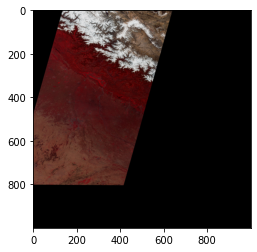

In [134]:
plt.imshow(cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB))

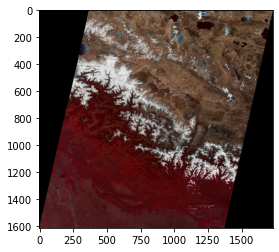

In [45]:
plt.imshow(cv2.cvtColor(o_img, cv2.COLOR_BGR2RGB))

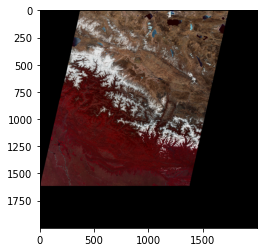

In [46]:
plt.imshow(cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB))

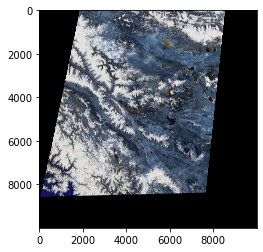

In [14]:
plt.imshow()

In [13]:
for i in pts1:
    image = cv2.circle(image, i.astype(int), 10, color=(0, 255, 0), thickness = 5)

In [136]:
data['match_confidence'][data['match_confidence']>0.5]

array([0.9291019 , 0.92967004, 0.9294865 , 0.9277211 , 0.94665545,
       0.92934823, 0.9302083 , 0.9298159 , 0.9298323 , 0.9297019 ,
       0.9299325 , 0.84001344, 0.9299702 , 0.92974716, 0.960097  ,
       0.92984736, 0.92681515, 0.92974585, 0.9297113 , 0.94137174,
       0.9296213 , 0.9298234 , 0.92202276, 0.9297108 , 0.9300531 ,
       0.93010634, 0.9297303 , 0.9298394 , 0.92968774, 0.92984116,
       0.9298873 , 0.9303299 , 0.82766086, 0.9523262 , 0.93001676,
       0.9294236 , 0.92995554, 0.9297973 , 0.92966115, 0.93227494,
       0.9298722 , 0.9302208 , 0.9401708 , 0.9293385 , 0.9500996 ,
       0.929819  , 0.93962723, 0.7671936 , 0.9298722 , 0.92978793,
       0.9503651 , 0.9297223 , 0.92985624, 0.9335775 , 0.9292441 ,
       0.9296904 , 0.93962455, 0.92976755, 0.9303033 , 0.9301365 ,
       0.9438951 , 0.92967933, 0.92930126, 0.9298154 , 0.9099774 ,
       0.93001765, 0.9290775 , 0.9298088 , 0.9297361 , 0.9296931 ,
       0.9312855 , 0.9306573 , 0.9297981 , 0.9298766 , 0.93013

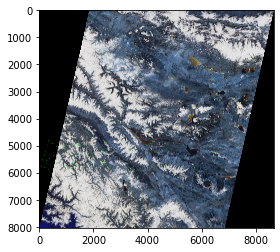

In [14]:
plt.imshow(image)

In [48]:
pts1

array([[ 62., 397.],
       [ 75., 396.],
       [ 23., 450.],
       [ 52., 451.],
       [ 72., 426.],
       [158., 436.],
       [178., 437.],
       [152., 468.],
       [226., 439.],
       [ 28., 468.],
       [244., 408.],
       [117., 397.],
       [274., 408.],
       [165., 429.],
       [ 96., 390.],
       [250., 387.],
       [148., 393.],
       [ 98., 426.],
       [ 61., 385.],
       [ 87., 465.],
       [155., 413.],
       [197., 394.],
       [214., 445.],
       [208., 438.],
       [ 72., 446.],
       [ 11., 440.],
       [ 50., 409.],
       [117., 454.],
       [ 62., 422.],
       [108., 418.],
       [167., 440.],
       [ 17., 426.],
       [147., 402.],
       [115., 405.],
       [170., 421.],
       [369., 457.],
       [ 74., 410.],
       [ 96., 411.],
       [427., 434.],
       [151., 450.],
       [103., 401.],
       [ 28., 384.],
       [ 41., 408.],
       [ 31., 436.],
       [366., 440.],
       [360., 455.],
       [516., 441.],
       [337.,

In [138]:
len(np.load('dump_match_pairs/7_18_matches.npz')['match_confidence'][np.load('dump_match_pairs/7_18_matches.npz')['match_confidence']>.5])

101

In [1]:
import numpy as np

In [6]:
a = np.array([[1, 2], [3, 4]])

In [7]:
np.mat(a)

matrix([[1, 2],
        [3, 4]])